In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

train = pd.read_csv(io.BytesIO(uploaded['SWaT.csv']))
train.head(5)

Saving SWaT.csv to SWaT.csv


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0.0,124.3135,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
1,22/12/2015 4:30:01 PM,0.0,124.3920,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
2,22/12/2015 4:30:02 PM,0.0,124.4705,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
3,22/12/2015 4:30:03 PM,0.0,124.6668,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
4,22/12/2015 4:30:04 PM,0.0,124.5098,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal


In [ ]:
train

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0.000000,124.3135,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
1,22/12/2015 4:30:01 PM,0.000000,124.3920,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
2,22/12/2015 4:30:02 PM,0.000000,124.4705,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
3,22/12/2015 4:30:03 PM,0.000000,124.6668,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
4,22/12/2015 4:30:04 PM,0.000000,124.5098,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494995,28/12/2015 9:59:55 AM,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.817100,1.778105,189.8552,0.000128,1,1,1,Normal
494996,28/12/2015 9:59:56 AM,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.817100,1.778105,189.5027,0.000128,1,1,1,Normal
494997,28/12/2015 9:59:57 AM,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,...,2,1,250.817100,1.778105,189.5027,0.000128,1,1,1,Normal
494998,28/12/2015 9:59:58 AM,2.428338,522.9252,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.817100,1.649953,189.5027,0.000128,1,1,1,Normal


In [6]:
columns = list(train.columns)
#test.columns = columns
#test.columns == train.columns

train['Normal/Attack'] = train['Normal/Attack'].replace('Normal', 0)
train.columns = train.columns.str.replace('Normal/Attack', 'attack')

#test.columns = test.columns.str.replace('Normal/Attack', 'attack')
#test['attack'] = test['attack'].replace('Normal', 0)
#test['attack'] = test['attack'].replace('Attack', 1)
#test['attack'] = test['attack'].replace('A ttack', 1)

train_labels = train.attack
#test_labels = test.attack

train.drop([' Timestamp', 'attack'], axis='columns', inplace=True)
#test.drop([' Timestamp', 'attack'], axis='columns', inplace=True)

In [7]:
train.isna().sum()

FIT101     0
LIT101     0
MV101      0
P101       0
P102       0
AIT201     0
AIT202     0
AIT203     0
FIT201     0
MV201      0
P201       0
P202       0
P203       0
P204       0
P205       0
P206       0
DPIT301    0
FIT301     0
LIT301     0
MV301      0
MV302      0
MV303      0
MV304      0
P301       0
P302       0
AIT401     0
AIT402     0
FIT401     0
LIT401     0
P401       0
P402       0
P403       0
P404       0
UV401      0
AIT501     0
AIT502     0
AIT503     0
AIT504     0
FIT501     0
FIT502     0
FIT503     0
FIT504     0
P501       0
P502       0
PIT501     0
PIT502     0
PIT503     0
FIT601     0
P601       0
P602       0
P603       0
dtype: int64

In [8]:
corr_matrix = train.corr(method='pearson')

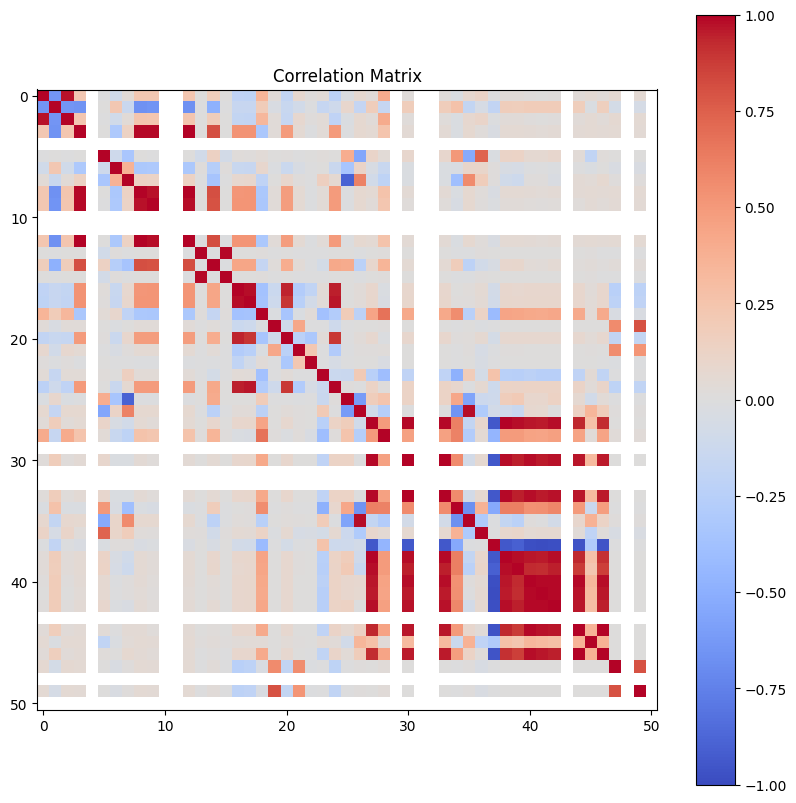

In [9]:
plt.figure(figsize=(10,10))  # You may want to adjust the size depending on your matrix
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

In [10]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [11]:
train_edges3 = pd.DataFrame(columns=["Source", "Target"])



In [12]:
# Iterate over the correlation matrix
for source_attribute, row in corr_matrix.iterrows():
    for target_attribute, corr_value in row.iteritems():

        # Check if correlation value is non-zero
        if np.abs(corr_value) > 0.5 and source_attribute != target_attribute :
          if not any((train_edges3["Target"] == source_attribute) & (train_edges3["Source"] == target_attribute)):

            # Append the edge to the data frame
            train_edges3 = train_edges3.append({"Source": source_attribute, "Target": target_attribute}, ignore_index=True)

# Print the resulting data frame
#print(df_edges)

<ipython-input-12-758bceddb1cd>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for target_attribute, corr_value in row.iteritems():
<ipython-input-12-758bceddb1cd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_edges3 = train_edges3.append({"Source": source_attribute, "Target": target_attribute}, ignore_index=True)
<ipython-input-12-758bceddb1cd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_edges3 = train_edges3.append({"Source": source_attribute, "Target": target_attribute}, ignore_index=True)
<ipython-input-12-758bceddb1cd>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for target_attribute, corr_value in row.iteritems():
<ipython-input-12-758bceddb1cd>:10: FutureWarning: The

In [13]:
train_edges3

,Source,Target
0,FIT101,LIT101
1,FIT101,MV101
2,LIT101,MV101
3,LIT101,P101
4,LIT101,FIT201
...,...,...
111,FIT504,PIT503
112,P501,PIT501
113,P501,PIT503
114,PIT501,PIT503


In [31]:
# Create a directed graph
G = nx.DiGraph()

# Add important nodes to the graph
nodes = ['AIT201','LIT301','PIT502','LIT301','P101', 'P203', 'P205', 'FIT301', 'MV302', 'P302', 'FIT401', 'LIT401', 'P402', 'UV401', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'PIT501', 'PIT503']
G.add_nodes_from(nodes)

# Add edges to the graph
for _, row in train_edges3.iterrows():
    G.add_edge(row['Source'], row['Target'])

In [32]:
# Define a personalized vector with high importance for specific nodes
personalized_vector = {node: 1 for node in nodes}

In [33]:
# Compute personalized PageRank scores
pagerank_scores = nx.pagerank(G, personalization=personalized_vector)

# Print the PageRank scores
for node, score in pagerank_scores.items():
    print(f"{node}: {score}")

AIT201: 0.019962737167626844
AIT401: 0.019962737167626844
LIT301: 0.019962737167626844
PIT502: 0.019962737167626844
P101: 0.019962737167626844
P203: 0.02397472956183324
P205: 0.030767621803110566
FIT301: 0.033828905016453796
MV302: 0.037401172028073915
P302: 0.06919167537473227
FIT401: 0.019962737167626844
LIT401: 0.028447044959888597
P402: 0.021505338584401706
UV401: 0.023333319594191278
FIT501: 0.03273490448692523
FIT502: 0.03737226515549342
FIT503: 0.043725421356584374
FIT504: 0.053016880471814264
P501: 0.06803805259938245
PIT501: 0.0911389223360428
PIT503: 0.16860782499327498
FIT101: 0.0
LIT101: 0.0
MV101: 0.0
FIT201: 0.0028281025974205825
MV201: 0.003308873918990398
DPIT301: 0.010804884635483722
AIT402: 0.01272646168839262
AIT501: 0.04788963635096802
AIT502: 0.02395010637692922
AIT503: 0.004242153896130874
AIT203: 0.0
P204: 0.0
P206: 0.0
MV301: 0.0
FIT601: 0.0
P602: 0.0
MV303: 0.0
AIT504: 0.01138927920772042


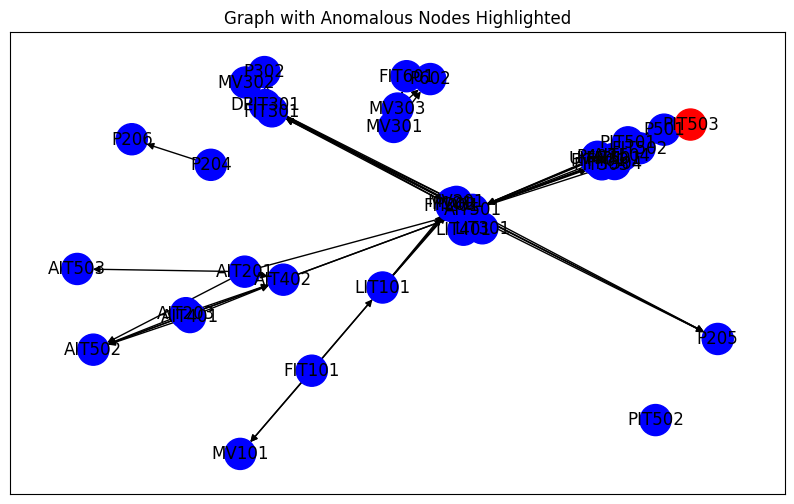

In [34]:
# Set anomaly threshold (you may need to adjust this based on your data)
anomaly_threshold = 0.1

# Create a list to store node colors
node_colors = ['blue' if score < anomaly_threshold else 'red' for score in pagerank_scores.values()]

# Draw the graph with node colors
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True, node_size=500)
plt.title("Graph with Anomalous Nodes Highlighted")
plt.show()

In [37]:
# Set anomaly threshold
anomaly_threshold = 0.1

# Ground truth labels
#SWat dataset does not have any truth labels for nodes because it is not a graph dataset.
#Here anomalous nodes are decided based on the outliers or extreme sensor values found for specific nodes
ground_truth = {
    'P101': 'normal',
    'P203': 'normal',
    'P205': 'normal',
    'FIT301': 'normal',
    'MV302': 'normal',
    'P302': 'normal',
    'FIT401': 'normal',
    'LIT401': 'normal',
    'P402': 'normal',
    'UV401': 'normal',
    'FIT501': 'normal',
    'FIT502': 'normal',
    'FIT503': 'normal',
    'FIT504': 'normal',
    'P501': 'normal',
    'PIT501': 'normal',
    'PIT503': 'anomalous',
    'AIT201': 'anomalous',
    'LIT301': 'anomalous',
    'PIT502': 'anomalous',
    'LIT301': 'anomalous'

}

# Calculate true positives and false positives
true_positives = 0
false_positives = 0
scores = []

for node, score in pagerank_scores.items():
    if node in ground_truth:
        scores.append((score, ground_truth[node]))

# Sort scores in descending order
scores.sort(reverse=True)

# Calculate average precision
num_anomalous = sum(1 for _, label in scores if label == 'anomalous')
total_precision = 0.0
num_true_positives = 0

for i, (score, label) in enumerate(scores):
    if label == 'anomalous':
        num_true_positives += 1
        precision = num_true_positives / (i + 1)
        total_precision += precision

average_precision = total_precision / num_anomalous

print("Average Precision:", average_precision)

Average Precision: 0.3672514619883041


In [38]:
# Calculate true positives, false positives, and false negatives
true_positives = 0
false_positives = 0
false_negatives = 0

for node, score in pagerank_scores.items():
    if node in ground_truth:
        if ground_truth[node] == 'anomalous':
            if score >= anomaly_threshold:
                true_positives += 1
            else:
                false_negatives += 1
        else:
            if score >= anomaly_threshold:
                false_positives += 1

# Calculate precision, recall, and F1-score
if true_positives + false_positives == 0:
    precision = 0
else:
    precision = true_positives / (true_positives + false_positives)

recall = true_positives / (true_positives + false_negatives)

if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: 1.0
Recall: 0.25
F1-score: 0.4
